In [1]:
from supervised.util import Config, Experiment, load_most_recent_results

from supervised.models.cnn import build_EfficientNetB0, build_camnetv2, build_camnet, build_basic_cnn,\
    build_camnet_reorderedv3, build_focal_modulator, build_focal_camnet, build_camnet_reorderedv4

from supervised.datasets.image_classification import deep_weeds, cats_dogs, dot_dataset, citrus_leaves
from supervised.data_augmentation.msda import mixup_dset, blended_dset
from supervised.data_augmentation.ssda import add_gaussian_noise_dset, custom_rand_augment_dset

import os
from os import listdir
from os.path import isfile, join

import pickle

2023-01-20 16:18:21.163454: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/fagg/miniconda3/envs/tf_bleeding5/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
"""
hardware_params must include:

    'n_gpu': uint
    'n_cpu': uint
    'node': str
    'partition': str
    'time': str (we will just write this to the file)
    'memory': uint
    'distributed': bool
"""
hardware_params = {
    'name': 'G4',
    'n_gpu': 2,
    'n_cpu': 32,
    'partition': 'ai2es',
    'nodelist': ['c733'],
    'time': '48:00:00',
    'memory': 8196,
    # The %04a is translated into a 4-digit number that encodes the SLURM_ARRAY_TASK_ID
    'stdout_path': '/scratch/jroth/supercomputer/text_outputs/exp%01a_stdout_%A.txt',
    'stderr_path': '/scratch/jroth/supercomputer/text_outputs/exp%01a_stderr_%A.txt',
    'email': 'jay.c.rothenberger@ou.edu',
    'dir': '/scratch/jroth/AI2ES-DL/',
    'array': '[0-8%1]'
}
"""
network_params must include:
    
    'network_fn': network building function
    'network_args': arguments to pass to network building function
        network_args must include:
            'lrate': float
    'hyperband': bool
"""
network_params = {
    'network_fn': build_camnet_reorderedv4,
    'network_args': {
        'lrate': 1e-3,
        'n_classes': 4,
        'iterations': 3,
        'conv_filters': ['[16]', '[24]', '[32]'],
        'depth': [6, 7, 8],
        'conv_size': '[3]',
        'dense_layers': '[32, 16]',
        'learning_rate': 5e-4,
        'image_size': (128, 128, 3),
        'l1': None,
        'l2': None,
        'alpha': .005,
        'beta': .5,
    },
    'hyperband': False
}
"""
experiment_params must include:
    
    'seed': random seed for computation
    'steps_per_epoch': uint
    'validation_steps': uint
    'patience': uint
    'min_delta': float
    'epochs': uint
    'nogo': bool
"""
experiment_params = {
    'seed': 42,
    'steps_per_epoch': 1024,
    'validation_steps': 256,
    'patience': 10,
    'min_delta': 0.0,
    'epochs': 512,
    'nogo': False,
}
"""
dataset_params must include:
    'dset_fn': dataset loading function
    'dset_args': arguments for dataset loading function
    'cache': str or bool
    'batch': uint
    'prefetch': uint
    'shuffle': bool
    'augs': iterable of data augmentation functions
"""
dataset_params = {
    'dset_fn': citrus_leaves,
    'dset_args': {
        'image_size': (128, 128),
        'path': '../data/',
    },
    'cache': True,
    'cache_to_lscratch': False,
    'batch': 12,
    'prefetch': 4,
    'shuffle': True,
    'augs': [custom_rand_augment_dset]
}

config = Config(hardware_params, network_params, dataset_params, experiment_params)


In [3]:
exp = Experiment(config)

print(exp.params)
exp.run_array(0)

{'seed': 42, 'steps_per_epoch': 1024, 'validation_steps': 256, 'patience': 10, 'min_delta': 0.0, 'epochs': 512, 'nogo': False}
Size of Hyperparameter Grid: 9
{
	name: G4
	n_gpu: 2
	n_cpu: 32
	partition: ai2es
	nodelist: ['c733']
	time: 48:00:00
	memory: 8196
	stdout_path: /scratch/jroth/supercomputer/text_outputs/exp%01a_stdout_%A.txt
	stderr_path: /scratch/jroth/supercomputer/text_outputs/exp%01a_stderr_%A.txt
	email: jay.c.rothenberger@ou.edu
	dir: /scratch/jroth/AI2ES-DL/
	array: [0-8%1]
	results_dir: results
	}
{
	seed: 42
	steps_per_epoch: 1024
	validation_steps: 256
	patience: 10
	min_delta: 0.0
	epochs: 512
	nogo: False
	}
{
	network_fn: <function build_camnet_reorderedv4 at 0x2b0944b2aef0>
	network_args: {
		hyperband: False
		depth: 6
		conv_filters: [16]
		conv_size: [3]
		n_classes: 4
		iterations: 3
		l2: None
		lrate: 0.001
		learning_rate: 0.0005
		alpha: 0.005
		l1: None
		image_size: (128, 128, 3)
		beta: 0.5
		dense_layers: [32, 16]
		}
	hyperband: False
	}
{
	dset_fn:

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1')


INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1')


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


/home/fagg/miniconda3/envs/tf_bleeding5/lib/python3.10/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


(None, 128, 128, 5)
1024 None
Model: "clam_masker"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 clam (Functional)              [(None, 4),          443237      ['input_1[0][0]',                
                                 (None,),                         'plurality_masker[0][0]',       
                                 (None, 128, 128, 5               'all_masker[0][0]']             
                                )]                                                                
                                                          

2023-01-20 16:18:28.179354: W tensorflow/core/grappler/optimizers/data/auto_shard.cc:547] The `assert_cardinality` transformation is currently not handled by the auto-shard rewrite and will be removed.


INFO:tensorflow:Error reported to Coordinator: 
Traceback (most recent call last):
  File "/home/fagg/miniconda3/envs/tf_bleeding5/lib/python3.10/site-packages/tensorflow/python/training/coordinator.py", line 293, in stop_on_exception
    yield
  File "/home/fagg/miniconda3/envs/tf_bleeding5/lib/python3.10/site-packages/tensorflow/python/distribute/mirrored_run.py", line 225, in _call_for_each_replica
    t.has_paused.wait()
  File "/home/fagg/miniconda3/envs/tf_bleeding5/lib/python3.10/threading.py", line 607, in wait
    signaled = self._cond.wait(timeout)
  File "/home/fagg/miniconda3/envs/tf_bleeding5/lib/python3.10/threading.py", line 320, in wait
    waiter.acquire()
KeyboardInterrupt


INFO:tensorflow:Error reported to Coordinator: 
Traceback (most recent call last):
  File "/home/fagg/miniconda3/envs/tf_bleeding5/lib/python3.10/site-packages/tensorflow/python/training/coordinator.py", line 293, in stop_on_exception
    yield
  File "/home/fagg/miniconda3/envs/tf_bleeding5/lib/python3.10/site-packages/tensorflow/python/distribute/mirrored_run.py", line 225, in _call_for_each_replica
    t.has_paused.wait()
  File "/home/fagg/miniconda3/envs/tf_bleeding5/lib/python3.10/threading.py", line 607, in wait
    signaled = self._cond.wait(timeout)
  File "/home/fagg/miniconda3/envs/tf_bleeding5/lib/python3.10/threading.py", line 320, in wait
    waiter.acquire()
KeyboardInterrupt


KeyboardInterrupt: 

In [ ]:
from supervised.models.cnn import *
from supervised.evaluations.image_classification import show_mask

from supervised.util import load_most_recent_results

result_path = '../results/'

results = load_most_recent_results(result_path, 1)[0]

results.summary()
results.config.dataset_params['dset_args']['path'] = '../data/'
class_names = results.config.dataset_params['dset_fn'](**results.config.dataset_params['dset_args'])['class_names']
model_data = results.model_data
keras_model = model_data.get_model()
test_dset = results.config.dataset_params['dset_fn'](**results.config.dataset_params['dset_args'])['test']
test_dset = test_dset.batch(1)

for x, y in iter(test_dset):
    print(x.shape, y.shape)
    break

show_mask(test_dset, 5, model_data, class_names=class_names)

In [ ]:
"""
hardware_params must include:

    'n_gpu': uint
    'n_cpu': uint
    'node': str
    'partition': str
    'time': str (we will just write this to the file)
    'memory': uint
    'distributed': bool
"""
hardware_params = {
    'name': 'G4',
    'n_gpu': 2,
    'n_cpu': 32,
    'partition': 'ai2es',
    'nodelist': ['c733'],
    'time': '48:00:00',
    'memory': 8196,
    # The %04a is translated into a 4-digit number that encodes the SLURM_ARRAY_TASK_ID
    'stdout_path': '/scratch/jroth/supercomputer/text_outputs/exp%01a_stdout_%A.txt',
    'stderr_path': '/scratch/jroth/supercomputer/text_outputs/exp%01a_stderr_%A.txt',
    'email': 'jay.c.rothenberger@ou.edu',
    'dir': '/scratch/jroth/AI2ES-DL/',
    'array': '[0-8%1]'
}
"""
network_params must include:
    
    'network_fn': network building function
    'network_args': arguments to pass to network building function
        network_args must include:
            'lrate': float
    'hyperband': bool
"""
network_params = {
    'network_fn': build_camnet_reorderedv4,
    'network_args': {
        'lrate': 1e-3,
        'n_classes': 4,
        'iterations': 3,
        'conv_filters': ['[16]', '[24]', '[32]'],
        'depth': [6, 7, 8],
        'conv_size': '[3]',
        'dense_layers': '[32, 16]',
        'learning_rate': 5e-4,
        'image_size': (128, 128, 3),
        'l1': None,
        'l2': None,
        'alpha': .005,
        'beta': .005,
    },
    'hyperband': False
}
"""
experiment_params must include:
    
    'seed': random seed for computation
    'steps_per_epoch': uint
    'validation_steps': uint
    'patience': uint
    'min_delta': float
    'epochs': uint
    'nogo': bool
"""
experiment_params = {
    'seed': 42,
    'steps_per_epoch': 1024,
    'validation_steps': 256,
    'patience': 10,
    'min_delta': 0.0,
    'epochs': 512,
    'nogo': False,
}
"""
dataset_params must include:
    'dset_fn': dataset loading function
    'dset_args': arguments for dataset loading function
    'cache': str or bool
    'batch': uint
    'prefetch': uint
    'shuffle': bool
    'augs': iterable of data augmentation functions
"""
dataset_params = {
    'dset_fn': citrus_leaves,
    'dset_args': {
        'image_size': (128, 128),
        'path': '../data/',
    },
    'cache': True,
    'cache_to_lscratch': False,
    'batch': 20,
    'prefetch': 4,
    'shuffle': True,
    'augs': [custom_rand_augment_dset]
}

config0 = Config(hardware_params, network_params, dataset_params, experiment_params)

In [ ]:
exp0 = Experiment(config0)

print(exp0.params)
exp0.run_array(0)

In [ ]:
from supervised.models.cnn import *
from supervised.evaluations.image_classification import show_mask

from supervised.util import load_most_recent_results

result_path = '../results/'

results = load_most_recent_results(result_path, 1)[0]

results.summary()
results.config.dataset_params['dset_args']['path'] = '../data/'
class_names = results.config.dataset_params['dset_fn'](**results.config.dataset_params['dset_args'])['class_names']
model_data = results.model_data
keras_model = model_data.get_model()
test_dset = results.config.dataset_params['dset_fn'](**results.config.dataset_params['dset_args'])['test']
test_dset = test_dset.batch(1)

for x, y in iter(test_dset):
    print(x.shape, y.shape)
    break

show_mask(test_dset, 5, model_data, class_names=class_names)

In [ ]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

In [ ]:
from supervised.util import prep_gpu

prep_gpu(12, 1, wait=False)

In [1]:
from supervised.util import Config, Experiment, load_most_recent_results

from supervised.models.cnn import build_camnet_reorderedv5, build_camnet_reorderedv6, build_camnet_reorderedv7

from supervised.datasets.image_classification import deep_weeds, cats_dogs, dot_dataset, citrus_leaves
from supervised.data_augmentation.msda import mixup_dset, blended_dset
from supervised.data_augmentation.ssda import add_gaussian_noise_dset, custom_rand_augment_dset, foff_dset

import os
from os import listdir
from os.path import isfile, join

import pickle

"""
hardware_params must include:

    'n_gpu': uint
    'n_cpu': uint
    'node': str
    'partition': str
    'time': str (we will just write this to the file)
    'memory': uint
    'distributed': bool
"""
hardware_params = {
    'name': 'G4',
    'n_gpu': 3,
    'n_cpu': 32,
    'partition': 'ai2es',
    'nodelist': ['c733'],
    'time': '48:00:00',
    'memory': 8196,
    # The %04a is translated into a 4-digit number that encodes the SLURM_ARRAY_TASK_ID
    'stdout_path': '/scratch/jroth/supercomputer/text_outputs/exp%01a_stdout_%A.txt',
    'stderr_path': '/scratch/jroth/supercomputer/text_outputs/exp%01a_stderr_%A.txt',
    'email': 'jay.c.rothenberger@ou.edu',
    'dir': '/scratch/jroth/AI2ES-DL/',
    'array': '[0-8%1]',
    'results_dir': 'fullrezdot'
}
"""
network_params must include:
    
    'network_fn': network building function
    'network_args': arguments to pass to network building function
        network_args must include:
            'lrate': float
    'hyperband': bool
"""
image_size = (256, 256, 3)


network_params = {
    'network_fn': build_camnet_reorderedv5,
    'network_args': {
        'lrate': 1e-3,
        'n_classes': 3,
        'iterations': 3,
        'conv_filters': 24,
        'depth': 6,
        'conv_size': '[3]',
        'dense_layers': '[32, 16]',
        'learning_rate': 1e-3,
        'image_size': image_size,
        'l1': None,
        'l2': None,
        'alpha': 2**(-10),
        'beta': 2**(-10),
    },
    'hyperband': False
}
"""
experiment_params must include:
    
    'seed': random seed for computation
    'steps_per_epoch': uint
    'validation_steps': uint
    'patience': uint
    'min_delta': float
    'epochs': uint
    'nogo': bool
"""
experiment_params = {
    'seed': 42,
    'steps_per_epoch': 512,
    'validation_steps': 256,
    'patience': 32,
    'min_delta': 0.0,
    'epochs': 512,
    'nogo': False,
}
"""
dataset_params must include:
    'dset_fn': dataset loading function
    'dset_args': arguments for dataset loading function
    'cache': str or bool
    'batch': uint
    'prefetch': uint
    'shuffle': bool
    'augs': iterable of data augmentation functions
"""
dataset_params = {
    'dset_fn': dot_dataset,
    'dset_args': {
        'image_size': image_size[:-1],
        'path': '../data/',
    },
    'cache': False,
    'cache_to_lscratch': False,
    'batch': 48,
    'prefetch': 4,
    'shuffle': True,
    'augs': []
}

config1 = Config(hardware_params, network_params, dataset_params, experiment_params)


2023-01-20 16:21:17.706056: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/fagg/miniconda3/envs/tf_bleeding5/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
exp1 = Experiment(config1)

print(exp1.params)

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import sys
stderr = sys.stderr
f = open(os.devnull, 'w')
sys.stderr = f

import warnings
with warnings.catch_warnings(record=True):
    warnings.simplefilter('ignore')
    exp1.run_array(0)
    
sys.stderr = stderr

{'seed': 42, 'steps_per_epoch': 512, 'validation_steps': 256, 'patience': 32, 'min_delta': 0.0, 'epochs': 512, 'nogo': False}
Size of Hyperparameter Grid: 1
{
	name: G4
	n_gpu: 3
	n_cpu: 32
	partition: ai2es
	nodelist: ['c733']
	time: 48:00:00
	memory: 8196
	stdout_path: /scratch/jroth/supercomputer/text_outputs/exp%01a_stdout_%A.txt
	stderr_path: /scratch/jroth/supercomputer/text_outputs/exp%01a_stderr_%A.txt
	email: jay.c.rothenberger@ou.edu
	dir: /scratch/jroth/AI2ES-DL/
	array: [0-8%1]
	results_dir: fullrezdot
	}
{
	seed: 42
	steps_per_epoch: 512
	validation_steps: 256
	patience: 32
	min_delta: 0.0
	epochs: 512
	nogo: False
	}
{
	network_fn: <function build_camnet_reorderedv5 at 0x2ae4afeaf370>
	network_args: {
		hyperband: False
		image_size: (256, 256, 3)
		lrate: 0.001
		conv_size: [3]
		l1: None
		depth: 5
		alpha: 0.0009765625
		conv_filters: 24
		l2: None
		learning_rate: 0.001
		beta: 0.0009765625
		iterations: 3
		dense_layers: [32, 16]
		n_classes: 3
		}
	hyperband: False


INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2')


INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2')


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


(None, 256, 256, 4)
.. (0): 2836.0
.. (1): 1344.0
.. (2): 2467.0
.. (0): 393.0
.. (1): 196.0
.. (2): 361.0
.. (0): 803.0
.. (1): 376.0
.. (2): 720.0
512 None
Model: "clam_masker"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 clam (Functional)              [(None, 3),          272692      ['input_1[0][0]',                
                                 (None,),                         'plurality_masker[0][0]',       
                                 (None, 256, 256, 4               'all_masker[0][0]']             
                             

INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:GPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2').


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:GPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2').


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:GPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2').


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:GPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2').


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:GPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2').


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:GPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2').


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:GPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2').


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:GPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2').


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:GPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2').


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:GPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2').


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:GPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2').


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:GPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2').


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:GPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2').


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:GPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2').


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:GPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2').


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:GPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2').


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:GPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2').


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:GPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2').


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:GPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2').


512/512 [==============================] - 414s 574ms/step - loss: 0.8001 - clam_loss: 0.7969 - tf.math.multiply_4_loss: 2.9143 - clam_1_loss: 0.3759 - clam_categorical_accuracy: 0.6378 - clam_1_categorical_accuracy: 0.3733 - val_loss: 2.1292 - val_clam_loss: 2.1259 - val_tf.math.multiply_4_loss: 2.9537 - val_clam_1_loss: 0.4756 - val_clam_categorical_accuracy: 0.2716 - val_clam_1_categorical_accuracy: 0.5368 - lr: 0.0010
Epoch 2/512
512/512 [==============================] - 279s 545ms/step - loss: 0.4866 - clam_loss: 0.4841 - tf.math.multiply_4_loss: 2.0886 - clam_1_loss: 0.4225 - clam_categorical_accuracy: 0.8150 - clam_1_categorical_accuracy: 0.3557 - val_loss: 0.9689 - val_clam_loss: 0.9658 - val_tf.math.multiply_4_loss: 2.8120 - val_clam_1_loss: 0.4118 - val_clam_categorical_accuracy: 0.5979 - val_clam_1_categorical_accuracy: 0.4863 - lr: 7.1394e-04
Epoch 3/512
512/512 [==============================] - 278s 542ms/step - loss: 0.3302 - clam_loss: 0.3279 - tf.math.multiply_4_loss:

In [ ]:
from supervised.models.cnn import *
from supervised.evaluations.image_classification import show_mask

from supervised.util import load_most_recent_results

result_path = '../random'

results = load_most_recent_results(result_path, 1)[0]

results.summary()
results.config.dataset_params['dset_args']['path'] = '../data/'
class_names = results.config.dataset_params['dset_fn'](**results.config.dataset_params['dset_args'])['class_names']
model_data = results.model_data
keras_model = model_data.get_model()
test_dset = results.config.dataset_params['dset_fn'](**results.config.dataset_params['dset_args'])['test']
test_dset = test_dset.batch(results.config.dataset_params['batch'])

for x, y in iter(test_dset):
    print(x.shape, y.shape)
    break

show_mask(test_dset, 5, model_data, class_names=class_names)

In [ ]:
print('hi')

In [ ]:
from supervised.util import Config, Experiment, load_most_recent_results

from supervised.models.cnn import build_camnet_reorderedv5, build_camnet_reorderedv6, build_camnet_reorderedv7, build_camnet_reorderedv8

from supervised.datasets.image_classification import deep_weeds, cats_dogs, dot_dataset, citrus_leaves
from supervised.data_augmentation.msda import mixup_dset, blended_dset
from supervised.data_augmentation.ssda import add_gaussian_noise_dset, custom_rand_augment_dset, foff_dset

import os
from os import listdir
from os.path import isfile, join

import pickle

"""
hardware_params must include:

    'n_gpu': uint
    'n_cpu': uint
    'node': str
    'partition': str
    'time': str (we will just write this to the file)
    'memory': uint
    'distributed': bool
"""
hardware_params = {
    'name': 'G4',
    'n_gpu': 3,
    'n_cpu': 32,
    'partition': 'ai2es',
    'nodelist': ['c733'],
    'time': '48:00:00',
    'memory': 8196,
    # The %04a is translated into a 4-digit number that encodes the SLURM_ARRAY_TASK_ID
    'stdout_path': '/scratch/jroth/supercomputer/text_outputs/exp%01a_stdout_%A.txt',
    'stderr_path': '/scratch/jroth/supercomputer/text_outputs/exp%01a_stderr_%A.txt',
    'email': 'jay.c.rothenberger@ou.edu',
    'dir': '/scratch/jroth/AI2ES-DL/',
    'array': '[0-8%1]',
    'results_dir': 'random'
}
"""
network_params must include:
    
    'network_fn': network building function
    'network_args': arguments to pass to network building function
        network_args must include:
            'lrate': float
    'hyperband': bool
"""
image_size = (128, 128, 3)


network_params = {
    'network_fn': build_camnet_reorderedv7,
    'network_args': {
        'lrate': 1e-3,
        'n_classes': 2,
        'iterations': 3,
        'conv_filters': 24,
        'conv_size': '[3]',
        'dense_layers': '[32, 16]',
        'learning_rate': 5e-4,
        'image_size': image_size,
        'l1': None,
        'l2': None,
        'alpha': 2**(-10),
        'beta': 2**(-10),
        # 'gamma': 1e-4,
        'noise_level': 0.005,
        'depth': 5,
    },
    'hyperband': False
}
"""
experiment_params must include:
    
    'seed': random seed for computation
    'steps_per_epoch': uint
    'validation_steps': uint
    'patience': uint
    'min_delta': float
    'epochs': uint
    'nogo': bool
"""
experiment_params = {
    'seed': 42,
    'steps_per_epoch': 512,
    'validation_steps': 256,
    'patience': 16,
    'min_delta': 0.0,
    'epochs': 512,
    'nogo': False,
}
"""
dataset_params must include:
    'dset_fn': dataset loading function
    'dset_args': arguments for dataset loading function
    'cache': str or bool
    'batch': uint
    'prefetch': uint
    'shuffle': bool
    'augs': iterable of data augmentation functions
"""
dataset_params = {
    'dset_fn': cats_dogs,
    'dset_args': {
        'image_size': image_size[:-1],
        'path': '../data/',
    },
    'cache': False,
    'cache_to_lscratch': False,
    'batch': 194,
    'prefetch': 8,
    'shuffle': True,
    'augs': [custom_rand_augment_dset]
}

config2 = Config(hardware_params, network_params, dataset_params, experiment_params)

exp2 = Experiment(config2)

print(exp2.params)
exp2.run_array(0)


------------------------------------------------------------
Experimental Results Summary (Index: 0)
------------------------------------------------------------
Dataset Params: {
	dset_fn: <function cats_dogs at 0x2b679a7439a0>
	dset_args: {
		image_size: (128, 128)
		path: ../data/
		}
	cache: False
	cache_to_lscratch: False
	batch: 97
	prefetch: 8
	shuffle: True
	augs: []
	}

Network Params:  {
	network_fn: <function build_camnet_reorderedv7 at 0x2b679a7436d0>
	network_args: {
		hyperband: False
		image_size: (128, 128, 3)
		conv_filters: 24
		alpha: 0.0009765625
		conv_size: [3]
		noise_level: 0.005
		iterations: 3
		beta: 0.0009765625
		dense_layers: [32, 16]
		depth: 5
		n_classes: 2
		lrate: 0.001
		l1: None
		gamma: 0.0001
		l2: None
		learning_rate: 0.0005
		}
	hyperband: False
	}
------------------------------------------------------------
Experiment Parameters: {
	seed: 42
	steps_per_epoch: 512
	validation_steps: 256
	patience: 16
	min_delta: 0.0
	epochs: 512
	nogo: False
	

Corrupt JPEG data: 104 extraneous bytes before marker 0xd9
Corrupt JPEG data: 402 extraneous bytes before marker 0xd9
Corrupt JPEG data: 70 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9
Corrupt JPEG data: 242 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9
Corrupt JPEG data: 232 extraneous bytes before marker 0xd9
Corrupt JPEG data: 104 extraneous bytes before marker 0xd9
Corrupt JPEG data: 402 extraneous bytes before marker 0xd9
Corrupt JPEG data: 70 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9
Corrupt JPEG data: 242 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9
Corrupt JPEG data: 232 extraneous bytes before marker 0xd9
Corrupt JPEG data: 133 extraneous bytes before marker 0xd9

(None, 128, 128, 3)


Corrupt JPEG data: 104 extraneous bytes before marker 0xd9
Corrupt JPEG data: 402 extraneous bytes before marker 0xd9
Corrupt JPEG data: 70 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9
Corrupt JPEG data: 242 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9
Corrupt JPEG data: 232 extraneous bytes before marker 0xd9
Corrupt JPEG data: 104 extraneous bytes before marker 0xd9
Corrupt JPEG data: 402 extraneous bytes before marker 0xd9
Corrupt JPEG data: 70 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9
Corrupt JPEG data: 242 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9
Corrupt JPEG data: 232 extraneous bytes before marker 0xd9
Corrupt JPEG data: 133 extraneous bytes before marker 0xd9

(97, 128, 128, 3) (97, 2)
(None, 128, 128, 3)
cats
4/4 [==============================] - 4s 85ms/step
(None, 128, 128, 3)
4/4 [==============================] - 2s 25ms/step
tf.Tensor([55  2], shape=(2,), dtype=int32)
4/4 [==============================] - 0s 65ms/step
(None, 128, 128, 3)
4/4 [==============================] - 1s 25ms/step
tf.Tensor([64  2], shape=(2,), dtype=int32)
4/4 [==============================] - 0s 65ms/step
(None, 128, 128, 3)
4/4 [==============================] - 1s 25ms/step
tf.Tensor([66  2], shape=(2,), dtype=int32)
4/4 [==============================] - 0s 61ms/step
(None, 128, 128, 3)
4/4 [==============================] - 1s 26ms/step
tf.Tensor([56  2], shape=(2,), dtype=int32)
4/4 [==============================] - 0s 65ms/step
(None, 128, 128, 3)
4/4 [==============================] - 1s 25ms/step
tf.Tensor([69  2], shape=(2,), dtype=int32)
4/4 [==============================] - 0s 62ms/step
(None, 128, 128, 3)
4/4 [==============================] 

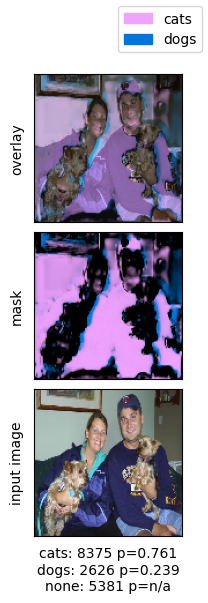

tf.Tensor([[0.02599323 0.9740068 ]], shape=(1, 2), dtype=float32)
(3, 1)


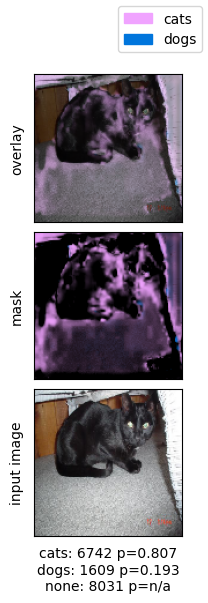

tf.Tensor([[0.07033367 0.9296664 ]], shape=(1, 2), dtype=float32)
(3, 1)


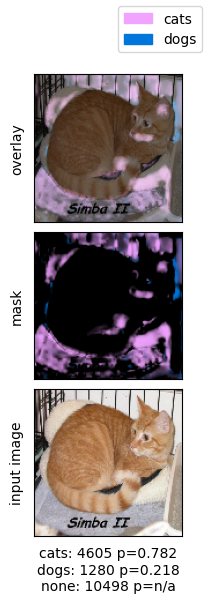

tf.Tensor([[0.07663848 0.92336154]], shape=(1, 2), dtype=float32)
(3, 1)


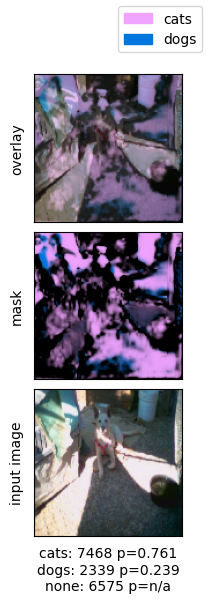

tf.Tensor([[0.04082794 0.95917207]], shape=(1, 2), dtype=float32)
(3, 1)


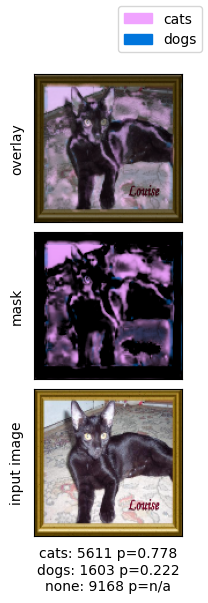

tf.Tensor([[0.02041653 0.9795835 ]], shape=(1, 2), dtype=float32)
(3, 1)


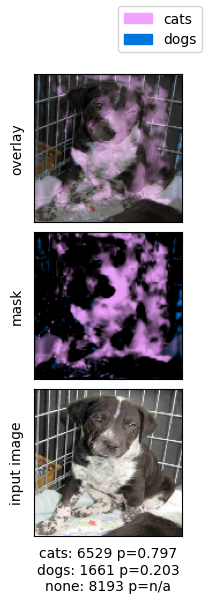

tf.Tensor([[0.01542751 0.9845725 ]], shape=(1, 2), dtype=float32)
(3, 1)


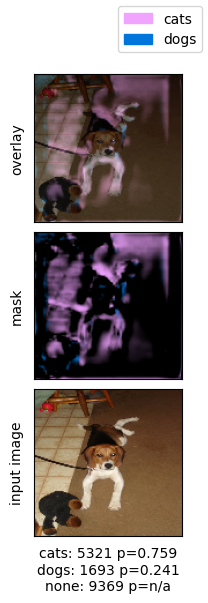

tf.Tensor([[2.4643799e-04 9.9975353e-01]], shape=(1, 2), dtype=float32)
(3, 1)


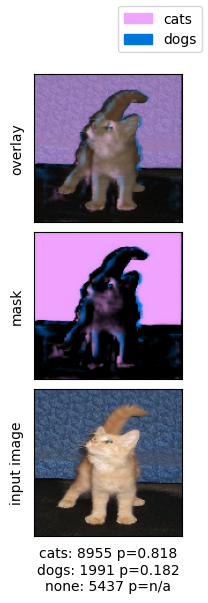

tf.Tensor([[0.6527512  0.34724882]], shape=(1, 2), dtype=float32)
(3, 1)


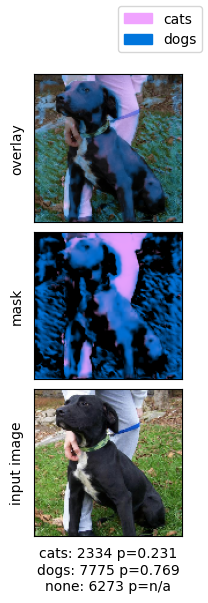

tf.Tensor([[0.43097922 0.56902075]], shape=(1, 2), dtype=float32)
(3, 1)


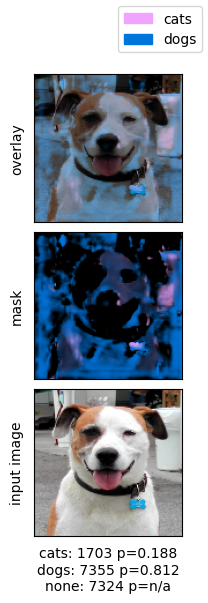

tf.Tensor([[0.52975434 0.47024572]], shape=(1, 2), dtype=float32)
(3, 1)


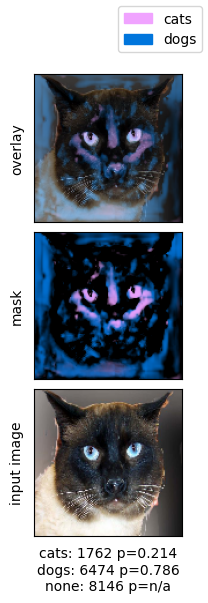

tf.Tensor([[0.6014454  0.39855465]], shape=(1, 2), dtype=float32)
(3, 1)


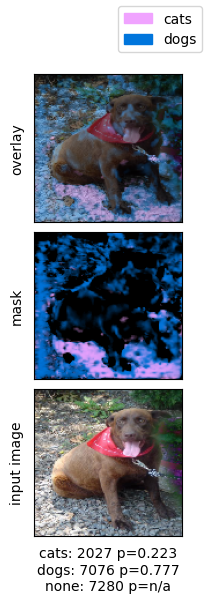

best_acc
tf.Tensor([[0.02677693 0.97322303]], shape=(1, 2), dtype=float32)
(3, 1)


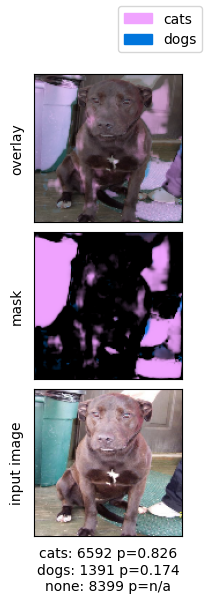

tf.Tensor([[0.02599323 0.9740068 ]], shape=(1, 2), dtype=float32)
(3, 1)


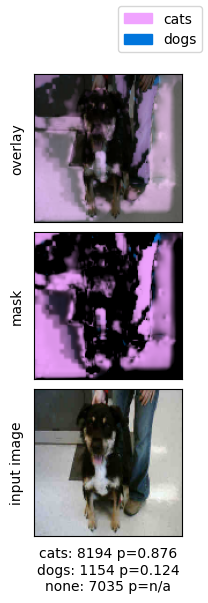

tf.Tensor([[0.07033367 0.9296664 ]], shape=(1, 2), dtype=float32)
(3, 1)


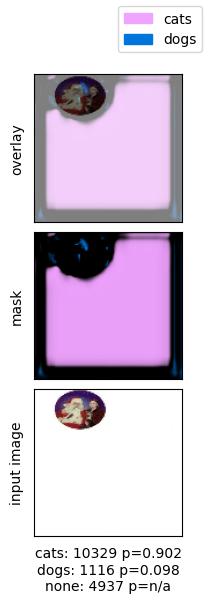

tf.Tensor([[0.07663848 0.92336154]], shape=(1, 2), dtype=float32)
(3, 1)


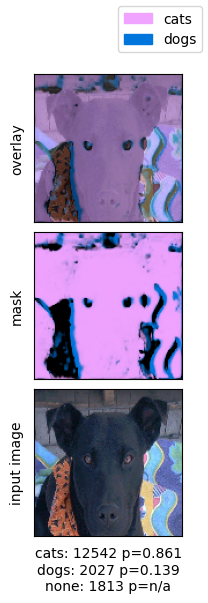

tf.Tensor([[0.04082794 0.95917207]], shape=(1, 2), dtype=float32)
(3, 1)


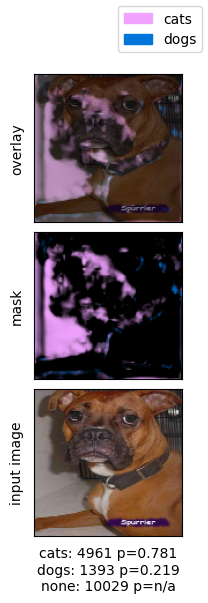

tf.Tensor([[0.02041653 0.9795835 ]], shape=(1, 2), dtype=float32)
(3, 1)


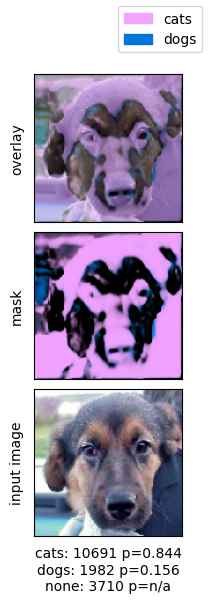

tf.Tensor([[0.01542751 0.9845725 ]], shape=(1, 2), dtype=float32)
(3, 1)


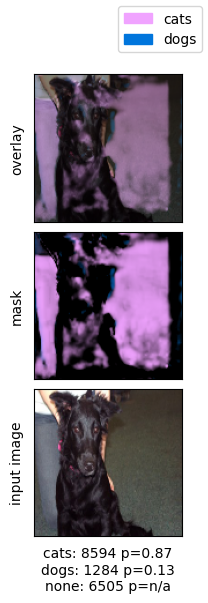

tf.Tensor([[2.4643799e-04 9.9975353e-01]], shape=(1, 2), dtype=float32)
(3, 1)


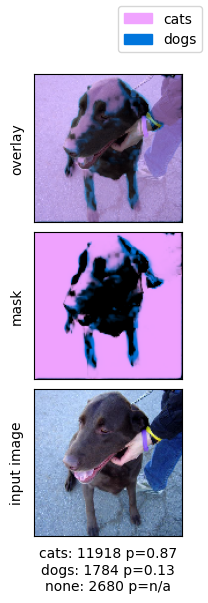

tf.Tensor([[0.6527512  0.34724882]], shape=(1, 2), dtype=float32)
(3, 1)


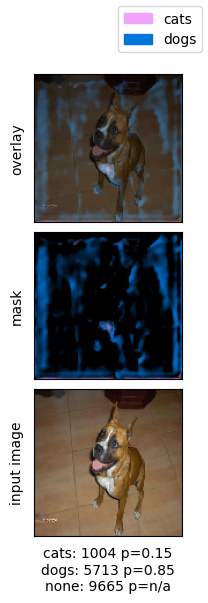

tf.Tensor([[0.43097922 0.56902075]], shape=(1, 2), dtype=float32)
(3, 1)


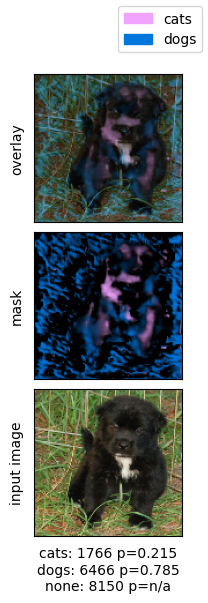

tf.Tensor([[0.52975434 0.47024572]], shape=(1, 2), dtype=float32)
(3, 1)


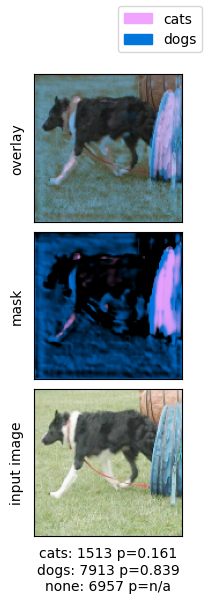

tf.Tensor([[0.6014454  0.39855465]], shape=(1, 2), dtype=float32)
(3, 1)


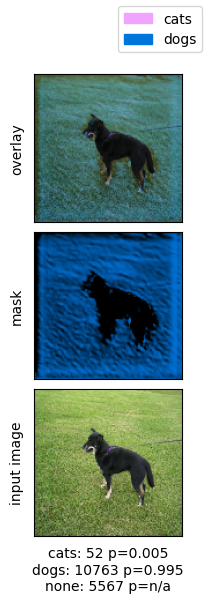

In [2]:
from supervised.models.cnn import *
from supervised.evaluations.image_classification import masking_evaluation

from supervised.util import load_most_recent_results

result_path = '../random/' #568735 (88% val acc)

results = load_most_recent_results(result_path, 2)[0]


results.summary()
results.config.dataset_params['dset_args']['path'] = '../data/'
class_names = results.config.dataset_params['dset_fn'](**results.config.dataset_params['dset_args'])['class_names']
model_data = results.model_data
keras_model = model_data.get_model()
test_dset = results.config.dataset_params['dset_fn'](**results.config.dataset_params['dset_args'])['val']
test_dset = test_dset.batch(results.config.dataset_params['batch'])

for x, y in iter(test_dset):
    print(x.shape, y.shape)
    break

masking_evaluation(model_data, test_dset, class_names, 8)

In [2]:
metrics = ['val_clam_categorical_accuracy', 'val_clam_1_categorical_accuracy']
performance_at_patience = {key: model_data.history[key][-1]
                                   for key in metrics}
performance_at_patience

{'val_clam_categorical_accuracy': 0.5210896134376526,
 'val_clam_1_categorical_accuracy': 0.5944639444351196}